In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('data/data.csv')
df.head()
df.replace({"SeniorCitizen": {1: "Yes", 0: "No"}}, inplace=True)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

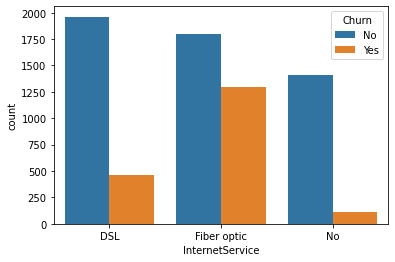

In [8]:
sns.countplot(x='InternetService', data=df, hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

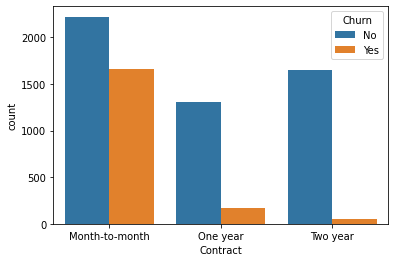

In [9]:
sns.countplot(x='Contract', data=df, hue='Churn')

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

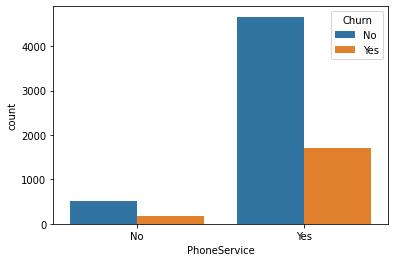

In [10]:
sns.countplot(x='PhoneService', data=df, hue='Churn')

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


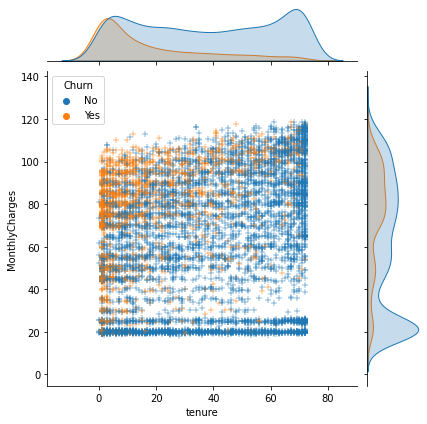

In [11]:
display(df[['tenure', 'MonthlyCharges']].corr())
sns.jointplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', kind='scatter', marker="+")

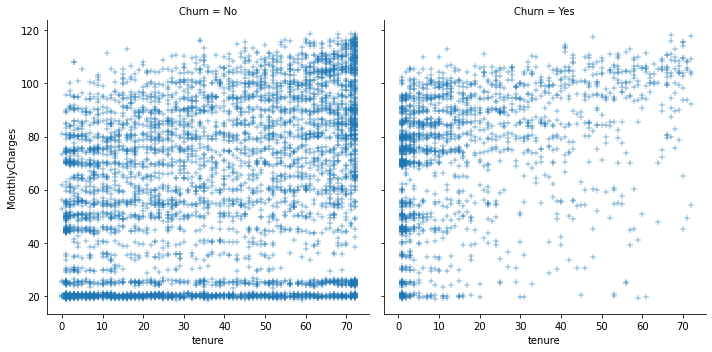

In [12]:
churnYes = df[df['Churn'] == 'Yes']
churnNo = df[df['Churn'] == 'No']
sns.relplot(data=df, x='tenure', y='MonthlyCharges', kind='scatter', marker='+', col='Churn')

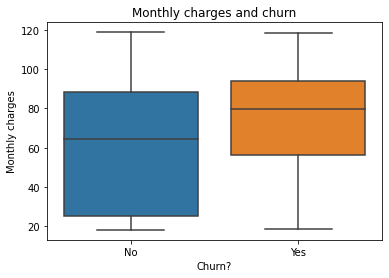

In [13]:
g = sns.boxplot(y='MonthlyCharges', x='Churn', data=df)
g.set(xlabel='Churn?', ylabel='Monthly charges', title='Monthly charges and churn');

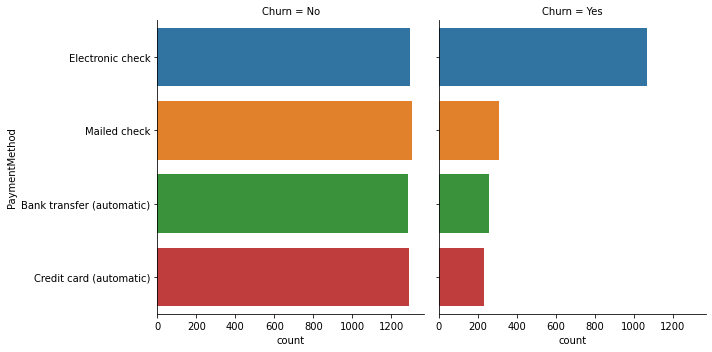

In [14]:
sns.catplot(data=df, y='PaymentMethod', col='Churn', kind='count')

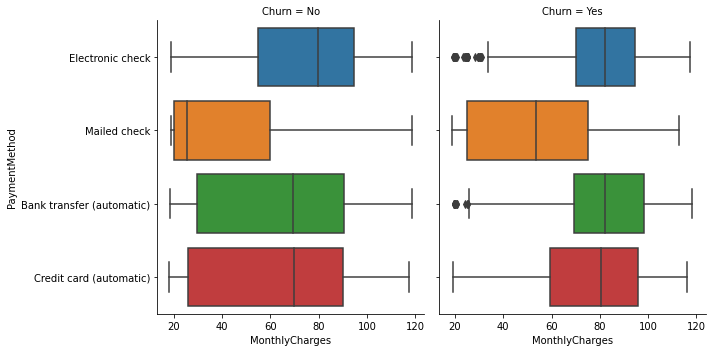

In [15]:
g = sns.catplot(y='PaymentMethod', x='MonthlyCharges', kind='box', col='Churn', data=df)

<AxesSubplot:>

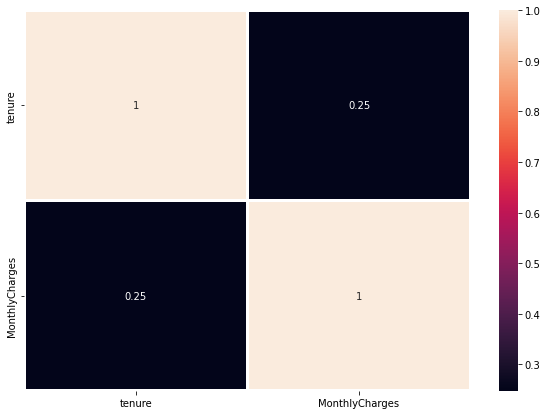

In [16]:
corr_data = pd.DataFrame(df)
plt.figure(figsize=(10,7))
sns.heatmap(corr_data.corr(),annot=True,linewidths=2)

In [21]:
num_feature = ['tenure','MonthlyCharges'] 
cat_feature = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

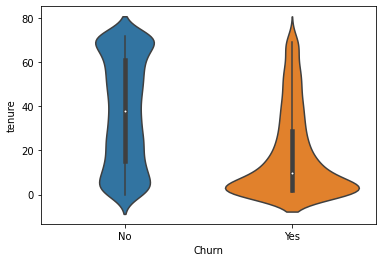

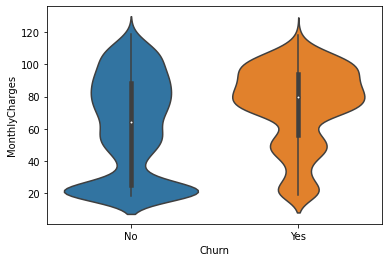

In [22]:
for col in num_feature:
    sns.violinplot(x='Churn',y=col,data=df)
    plt.show()

In [23]:
df[num_feature].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


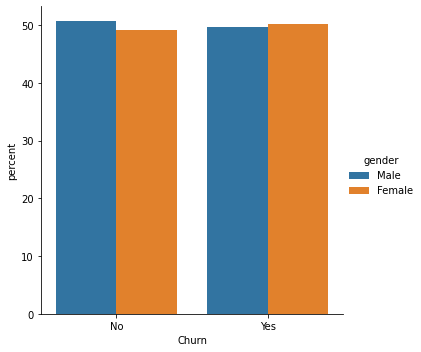

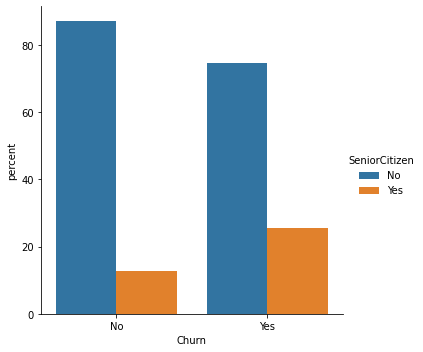

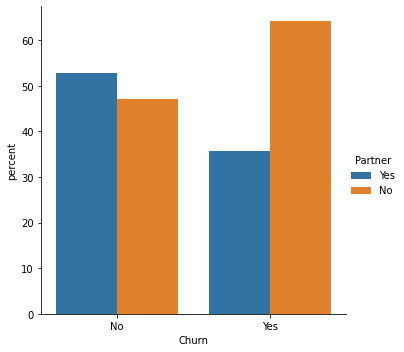

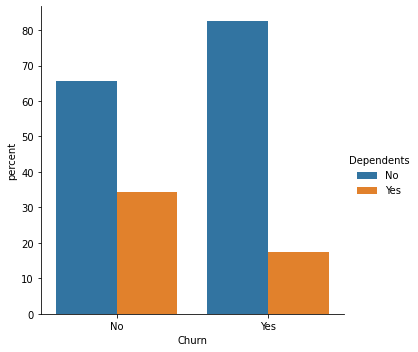

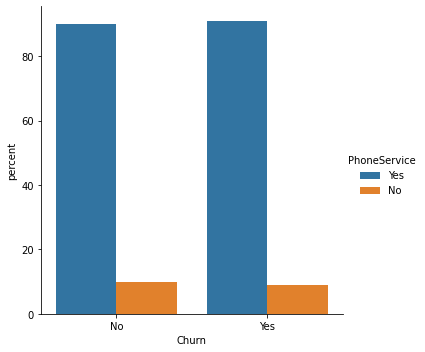

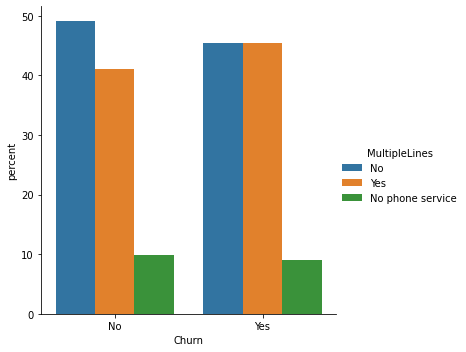

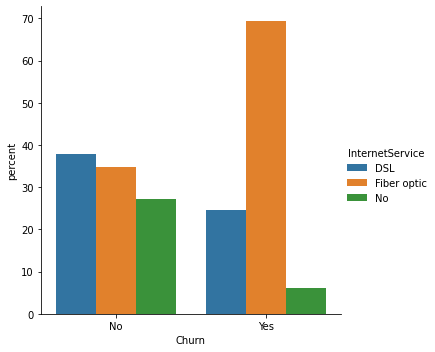

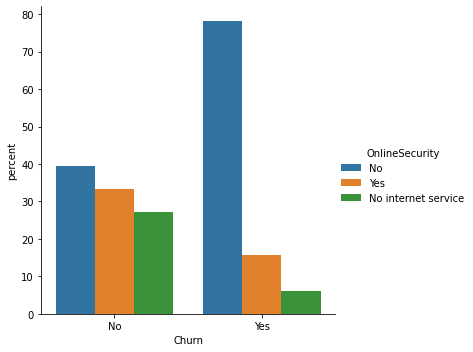

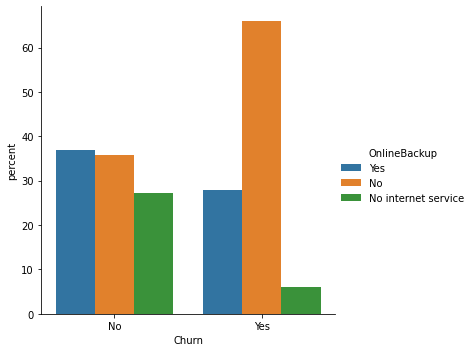

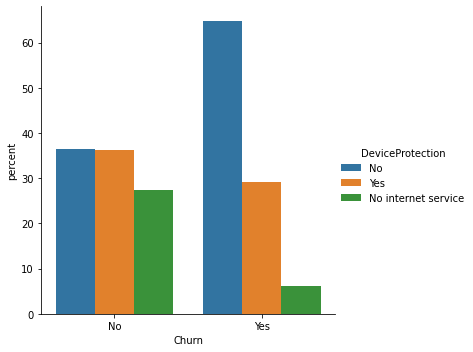

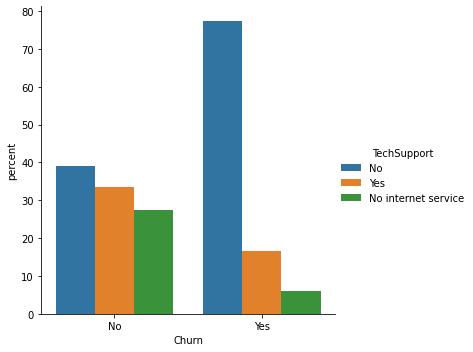

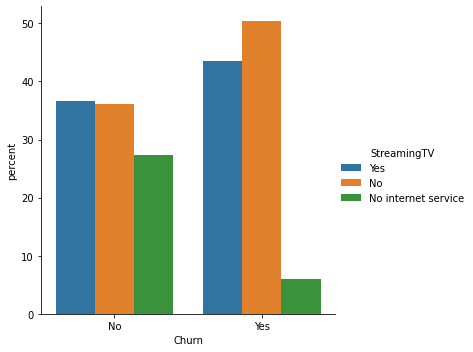

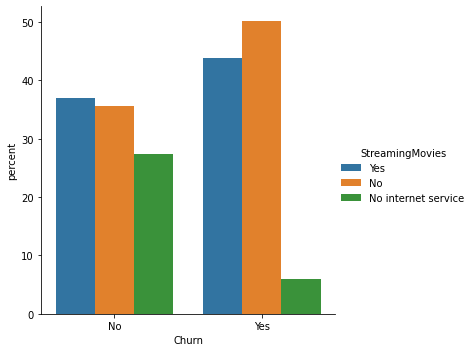

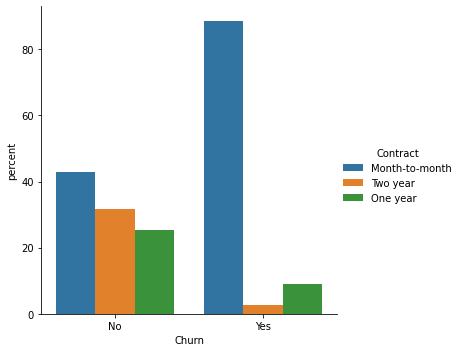

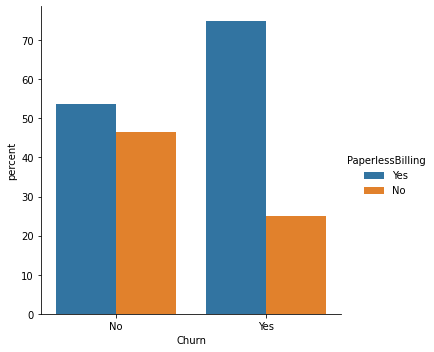

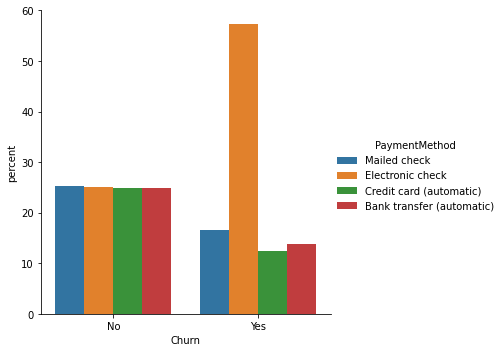

In [24]:
for col in cat_feature:
    x,y = 'Churn', col

    (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

    plt.show()

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
